# Step 1: Data Collection


In [20]:
import pandas as pd
data=pd.read_csv("creditcard.csv")


# Step 2: Data preprocessing 

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


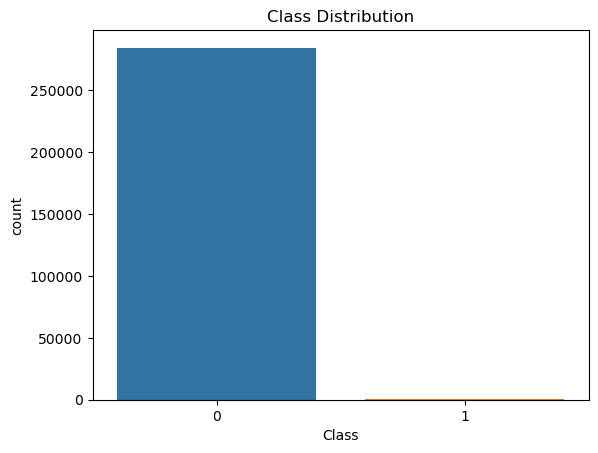

In [22]:
# Check for missing values
print(data.isnull().sum())

# Normalize the 'Amount' feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop unnecessary columns
data = data.drop(columns=["Time"])
# Display the distribution of classes
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


In [23]:
# Display the last few rows of the dataset
print(data.tail())

               V1         V2        V3        V4        V5        V6  \
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
284802 -4.918215  7.305334  1.914428  4.356170  ...  0.213454  0.111864   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.214205  0.924384   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.232045  0.578229   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.265245  0.800049   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28    Amount  \
284802  1.014480 -0.509348  1.436807

# Step 3: Feature Engineering

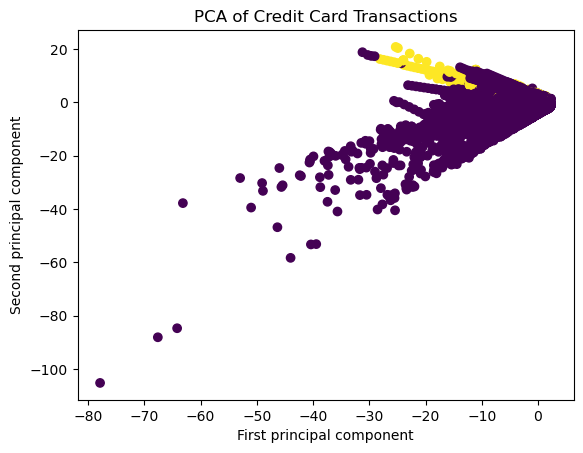

In [24]:
# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Dimensionality Reduction (optional)
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the reduced dimensions
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title('PCA of Credit Card Transactions')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


# Step 4: Model Selection

In [25]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Choose models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}


# Step 5: Model Training


In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Use a smaller subset of the data
data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Define feature matrix X and target vector y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions
pca = PCA(n_components=10)  # Adjust the number of components based on variance retained
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define a simpler model
model = LogisticRegression(max_iter=1000)

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10]
}

# Train and tune model using GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_
print(f"Best parameters: {grid.best_params_}")

# Evaluate the model on the test set
accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {accuracy}")


Best parameters: {'C': 1}
Test accuracy: 0.9989468141126909


# Step 6: Model Evaluation

In [27]:
# Import necessary libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print(f"\nEvaluation Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics for Logistic Regression:
Accuracy: 0.9989
Precision: 0.5000
Recall: 0.6667
F1 Score: 0.5714
Confusion Matrix:
[[5687    4]
 [   2    4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.50      0.67      0.57         6

    accuracy                           1.00      5697
   macro avg       0.75      0.83      0.79      5697
weighted avg       1.00      1.00      1.00      5697



#  Step 7: Model Deployment

In [28]:
# Get the best model
import joblib
from flask import Flask, request, jsonify

best_model = grid.best_estimator_
print(f"Best parameters: {grid.best_params_}")

# Evaluate the model on the test set
accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Save the trained model
joblib.dump(grid.best_estimator_, 'credit_card_fraud_model.pkl')

# Load the model
model = joblib.load('credit_card_fraud_model.pkl')

# Deploy using a web framework (example using Flask)
app = Flask(__name__)



Best parameters: {'C': 1}
Test accuracy: 0.9989468141126909


# Step 8: Documentation and Reporting

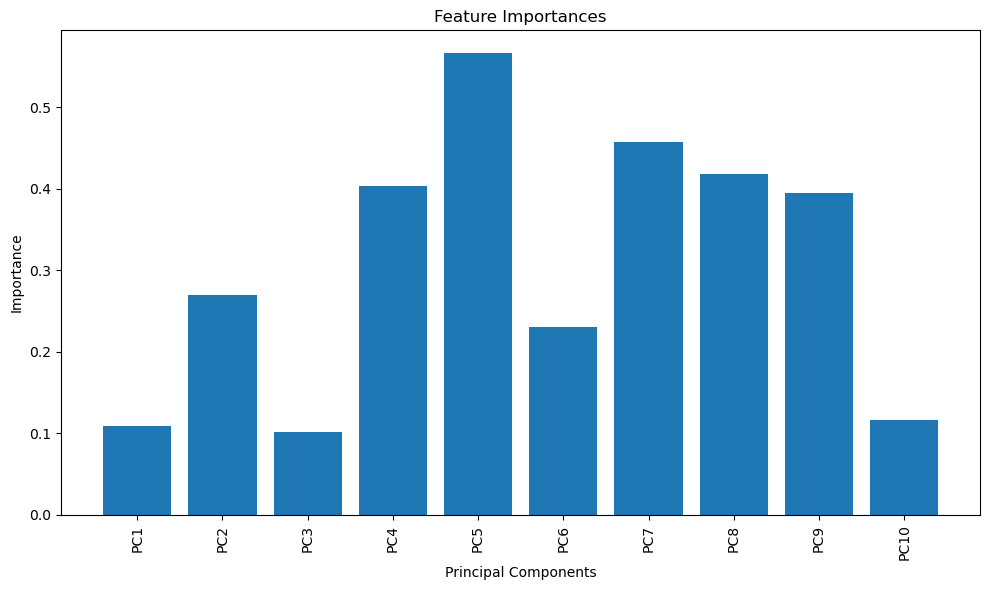

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


# Plot feature importance (considering PCA transformed features)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_pca.shape[1]), np.abs(model.coef_[0]), align='center')
plt.xticks(range(X_pca.shape[1]), ['PC'+str(i+1) for i in range(X_pca.shape[1])], rotation=90)
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Save a summary report
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

with open('model_report.txt', 'w') as f:
    f.write("Logistic Regression Model Report:\n\n")
    f.write(f"Test accuracy: {accuracy}\n\n")
    f.write("Classification Report:\n")
    f.write(report)


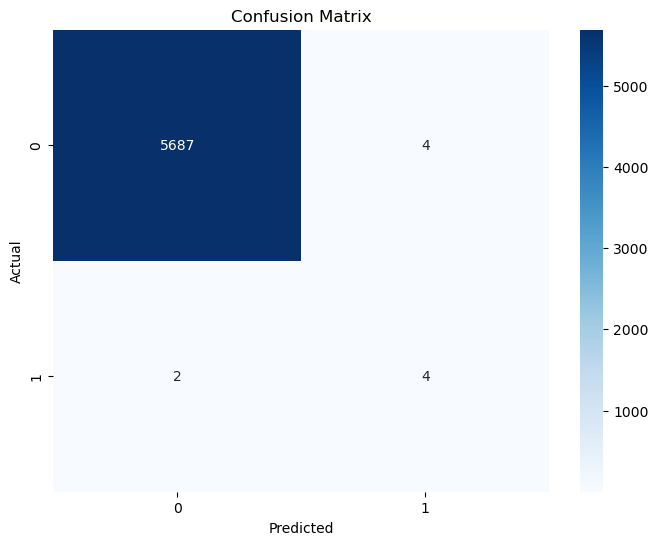

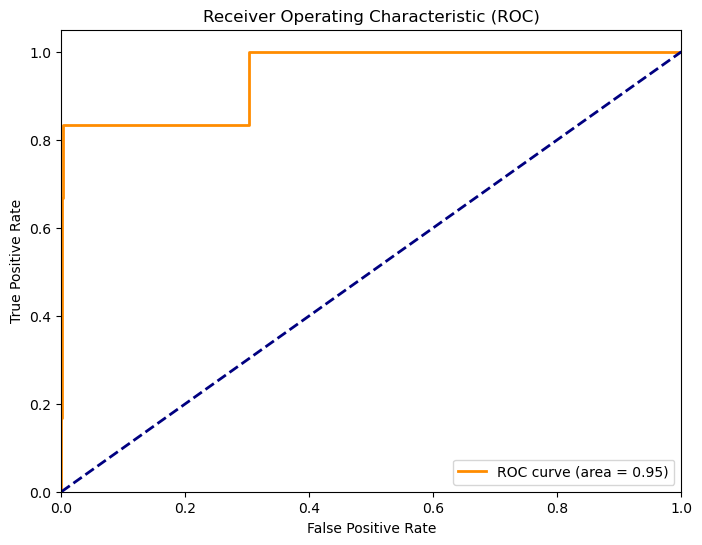

In [30]:
# Save the report to a text file
with open('credit_card_fraud_detection_report.txt', 'w') as f:
    f.write("Credit Card Fraud Detection Report\n\n")
    f.write("Best parameters: {}\n".format(grid.best_params_))
    f.write("Test accuracy: {:.2f}\n\n".format(accuracy))
    f.write("Classification Report:\n{}\n".format(classification_report(y_test, y_pred)))
    f.write("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, y_pred)))
    
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
y_score = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [31]:
# Example: Comparison of two models
from sklearn.ensemble import RandomForestClassifier

# Train another model (e.g., Random Forest) similarly
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Compare model performances
print("Logistic Regression:")
print(classification_report(y_test, y_pred))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.50      0.67      0.57         6

    accuracy                           1.00      5697
   macro avg       0.75      0.83      0.79      5697
weighted avg       1.00      1.00      1.00      5697

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.33      0.33      0.33         6

    accuracy                           1.00      5697
   macro avg       0.67      0.67      0.67      5697
weighted avg       1.00      1.00      1.00      5697



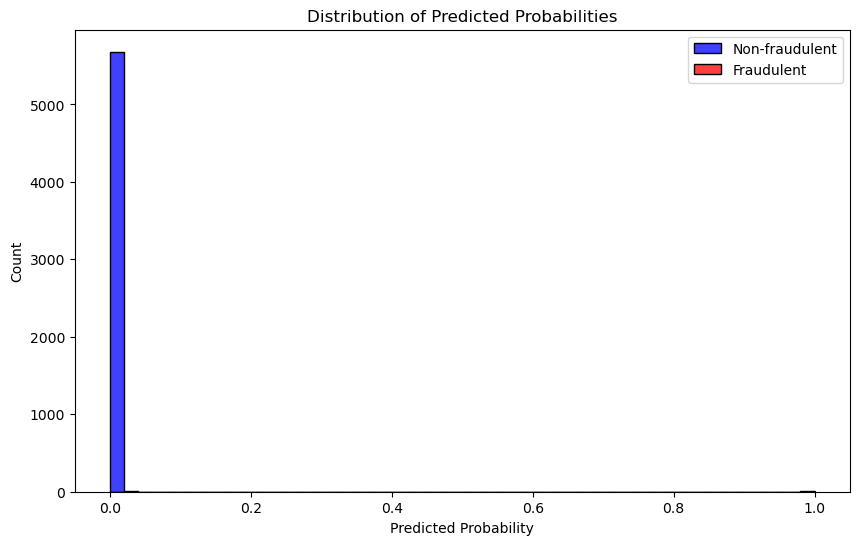

In [32]:
# Distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_score[y_test == 0], bins=50, color='b', label='Non-fraudulent')
sns.histplot(y_score[y_test == 1], bins=50, color='r', label='Fraudulent')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.show()


In [33]:
# Generate report
with open('report.txt', 'w') as f:
    f.write("Credit Card Fraud Detection Report\n\n")
    
    # Data Preprocessing
    f.write("Data Preprocessing:\n")
    f.write("- Statistical Summary:\n")
    f.write(str(data.describe()) + "\n\n")
    
    # Feature Engineering
    f.write("Feature Engineering:\n")
    f.write("- Selected Features and PCA Visualization\n\n")
    
    # Model Selection and Training
    f.write("Model Selection and Training:\n")
    f.write("- Random Forest with Hyperparameter Tuning\n\n")
    
    # Model Evaluation
    f.write("Model Evaluation:\n")
    f.write("- Classification Report and Accuracy:\n")
    f.write(str(classification_report(y_test, y_pred)) + "\n\n")
    
    # Confusion Matrix
    f.write("Confusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_pred)) + "\n\n")
    
    # Summary
    f.write("Summary:\n")
    f.write("- Overall performance analysis and key findings:\n")
    f.write("- Identified challenges and recommendations for future improvements\n")

